# COGS 108 - Final Project 

# Overview

Our project aims to determine how a high school student's level of involvement in school may affect alcohol consumption levels. We will be looking at data regarding a teen’s study time, final grades, whether they attended additional paid classes, aim to go to higher education and their amount of school absences to determine whether there is a correlation.

# Github link

https://github.com/kaiitheguy/FinalProjectGroup62

# Names

- Yikai Chen
- Shu Yao Wu
- James Beighley
- Falak Hotchandani
- Katherine Ngo

# Group Members IDs

- A13531003
- A13579395
- A13103167
- A15711717
- A14530341

# Research Question

How does involvement and performance in school contribute to changes in alcohol consumption amongst high school students?

## Background and Prior Work

Unhealthy alcohol use among students is a major public health concern because it is a common occurence, and as college students ourselves who have gone through highschool, we can vouch for the accuracy of the statement. Therefore, it is important that we attempt to reduce the amount of consumption of underaged people. According to an article(Referecnce 1) about why teens consume alcohol, a hypothesis was made that teens during this time go through physical and emotional lifestyle changes and development, and tend to seek out potentially dangerous situations. 
Another article(Reference 4), states that teen parties are also a huge factor as to why teens may be consuming alcohol. 

From doing background research, we were able to identify and hypothesize further on several common leads and motives in teenager alcohol usage. One of our hypothesis included that maybe if the child was busy in partaking in school realted activities, they would not have free time to attend parties, or drink during other occasions. Therefore, our efforts are focused on finding data related to a teen's alcohol consumption level as well as their involvement in school related activities and academics. In addition, we also learned how to better measure alcohol consumption(Reference 2) so that we could relate alcohol consumption better with usage and have a better understanding of the dataset(Reference 6) we are using. The aim of the current research is to see if there is a drinking patterns of US high school students along with their school involvement, and if so, come up with solutions to reduce the amount of alcohol consumption amongst high school students. 


References:
  1) Why Do Adolescents Drink, What Are the Risks, and How Can Underage Drinking Be Prevented?
     https://pubs.niaaa.nih.gov/publications/AA67/AA67.htm

  2) Measuring Alcohol Consumption in the United States 
     https://link.springer.com/chapter/10.1007/978-1-4899-1669-3_3

  3) Fact Sheet: Underaged Drinking
     https://www.cdc.gov/alcohol/fact-sheets/underage-drinking.htm

  4) High School Students and Drinking 
     https://consumer.healthday.com/encyclopedia/substance-abuse-38/kids-and-alcohol-health-news-11/high-school-          students-and-drinking-646006.html

  5) The burden of alcohol use: Excessive alcohol consumption and related consequences among college students.            https://psycnet.apa.org/record/2014-07285-012
  
  6) Student Alcohol Consumption 
     https://www.kaggle.com/marcdeveaux/student-alcohol-consumption/data?fbclid=IwAR3hHE1tr1PkaKMKZDplvOV5fQ4xL-     
     Lwj0s75quYg3zeY61T0qEnDvDTJvo


In conclusion, the correlation we want to find out should be lined along with school involvement of the students. Using the dataset in Reference 6, we could get data of level of student alcohol consumption and student school involvement.


# Hypothesis


Our group believes that if a student is more involved in school, they will consume less alcohol than the students who are less involved in the school. Being more involved in school means the student spends a good amount of time studying, has average to high grades, and partakes in extracurricular activities. The reason we believe this may be true is that if students are busy with school, they care more about their education rather than consuming alcohol.


# Dataset(s)

- Dataset Name: Student Alcohol Consumption
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption?fbclid=IwAR2_MlaQXajzt3m9nxq5EPlHWKr8E66t6HuUoq5aAyoD5lgYU2JIy9p2rSo
- Number of observations: 1044

The data set that we are using actually consists of two data sets with the same questions. Both data sets contain information about the student's study information, gender, family background and alcohol consumption. One data set targeted students taking math courses in high school while the other data set targeted students taking a Portuguese class in high school. Since the data had the same categotries, we were able to merge the data together by concatenating them. 

The following attributes apply to our dataset:

studytime - weekly study time (numeric: 1 = < 2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, or 4 = >10 hours)

failures - number of past class failures

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

absences - number of school absences (numeric: from 0 to 93)

final grade - numeric: from 0-20




# Setup

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

There are a lot of columns of data in this data set, so we decided to choose only the relevant columns to keep that related to our hypothesis. Coulmns we felt were not necessary were the ones relating to family life / background, extracurricular activities, gender and age. The main data we wanted to focus on was data regarding involvement in school and alcohol consumption. The data columns we ended up keeping were study time, paid classes, failures of class, wants to take higher education, workday alcohol consumption, weekend alcohol consumption, school absences, final grades. Other than keeping those columns, we also created two new columns to hold the average alcohol consumption data and average school involvement data. 

Overall our data set was very simplified in the sense that there were no variance in answers. For example, for level of alcohol consumption, students were only able to input the numbers 1, 2, 3 , 4 or 5. As a result, we did not have to standardize the data.

In [3]:
# Read two dataframe
stud_mat = pd.read_csv('student-mat.csv')
stud_por = pd.read_csv('student-por.csv')

We started cleaning the data by combining the two data sets that we had and renaming the columns to organize it.

In [4]:
# Combine the two dataset
frames = [stud_mat, stud_por]
df_stud = pd.concat(frames)
df_stud = df_stud.reset_index()

In [5]:
# Delete the columns we don’t need
df = df_stud[['studytime', 'paid', 'failures', 'higher', 'Dalc', 'Walc', 'absences', 'G3']]


In [6]:
# Renaming the columns of the dataframe
df.columns = ["study_time", "paid_classes", "failures_of_class", "want_higher_edu", "workday_alc", "weekend_alc",
              "school_absences", "final_grades"]
df.dtypes


study_time            int64
paid_classes         object
failures_of_class     int64
want_higher_edu      object
workday_alc           int64
weekend_alc           int64
school_absences       int64
final_grades          int64
dtype: object

A simple check was performed to make sure the data had no null data.

In [7]:
df.isnull().sum().sum()

0

In [8]:
#combining the alcohol consumption during the work day and weekend into a new column 'alc'.
alc = 2/7*df['workday_alc']+5/7*df['weekend_alc']
df['alc'] = alc

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#sort the alc column
df = df.sort_values(by=['alc'])

We also wanted to combine the relevant columns to school into one column to measure the average level of a student's school involvement. To do this, we assigned a weight ranging from 1-5 to each column based on how important we thought the column was. For example, we believed that study time should have a higher weight because we believed it would affect a student's school performance more. For the paid classes and wanting higher education columns, we changed the values since they are binary.

The columns we believed would increase school involvement were study time, paid classes, wanting higher education and final grades. The columns that would decrease a student's school involvment would be school absences and failures of classes. 

In [10]:
#Tranformation: convert paid classes and wanting higher education into numerical data
def convert_label(label):
    
    if(label == 'no'):
        return 1.0
    elif(label == 'yes'):
        return 0.0
    else: 
        return label
df['paid_classes'] = df['paid_classes'].apply(convert_label)
df['want_higher_edu'] = df['want_higher_edu'].apply(convert_label)

#Calculate the average involvment of students by using weights
school_involvement = 3*df['study_time'] + 2*df['paid_classes']-3*df['failures_of_class'] + 2*df['want_higher_edu'] - 2*df['school_absences']+ 2*df['final_grades']
df['school_involvement'] = school_involvement


In [11]:
#Print out final data set
df

,study_time,paid_classes,failures_of_class,want_higher_edu,workday_alc,weekend_alc,school_absences,final_grades,alc,school_involvement
0,2,1.0,0,0.0,1,1,6,6,1.000000,8.0
532,1,1.0,1,0.0,1,1,12,11,1.000000,0.0
531,1,1.0,0,0.0,1,1,4,11,1.000000,19.0
522,2,1.0,2,1.0,1,1,0,11,1.000000,26.0
519,2,1.0,0,0.0,1,1,0,11,1.000000,30.0
512,1,1.0,0,0.0,1,1,6,15,1.000000,23.0
511,2,1.0,0,0.0,1,1,4,16,1.000000,32.0
509,2,1.0,0,0.0,1,1,4,10,1.000000,20.0
508,1,1.0,0,0.0,1,1,10,18,1.000000,21.0
507,2,1.0,1,0.0,1,1,12,10,1.000000,1.0


# Data Analysis & Results

We first decided to plot weekend alcohol consumption levels against all the other data relating to school involvement to visualize the data and get a better idea of whether or not school involvement has an effect on a student's alcohol consumption.

In [12]:
df.columns

Index(['study_time', 'paid_classes', 'failures_of_class', 'want_higher_edu',
       'workday_alc', 'weekend_alc', 'school_absences', 'final_grades', 'alc',
       'school_involvement'],
      dtype='object')

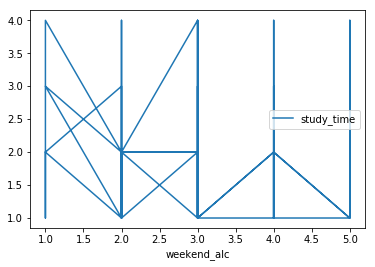

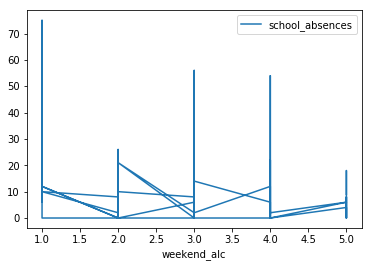

In [13]:
#Plot level of weekend alcohol consumption against each factors
#cols = ["study_time", "failures_of_class",
#              "school_absences", "final_grades"]
cols = ["study_time", "school_absences"]
for col in cols:
    df.plot.line(x='weekend_alc', y=col,)


As seen from the graphs above, there seems to be no prominent correlation between alcohol consumption and school involvement factors. Therefore, we plotted the level of workday alcohol consumption against each school factor to see if the graphs would be able to give us graphs that have more correlation. 

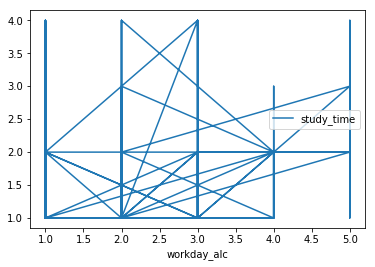

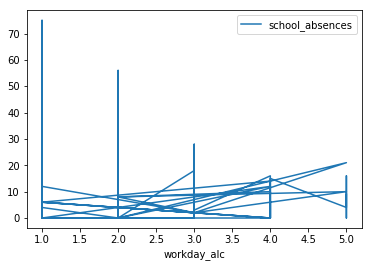

In [14]:
#Plot level of workday alcohol consumption against each factor
#cols = ["study_time", "failures_of_class", "weekend_alc",
#              "school_absences", "final_grades"]
cols = ["study_time", "school_absences"]
for col in cols:
    df.plot.line(x='workday_alc',y=col)


In the last, we only kept two of them since the other graphs are as mess as the graph between study time and alcohol consumption.

Similar to the weekend alcohol consumption graphs, not much correlation could be found. One interesting graph is the workday alocohol consumption vs school absences. Students who have a lower level of alcohol consumption has more school absences than students who have a higher level of alochol consumption. This data goes against our hypothesis.

As we have two columns for alcohol consumption, workday and weekend, we decided to combine the two columns into one average alcohol consumption level for each student. Because the weekend alcohol consumption has a more strong correlation with other factors than workday alcohol consumption. We plan to weight the two alcohol consumption into one variablt and give the percentage as 7/3 of weekend/workday.

Then, we plot the average level of alcohol consumption after weighing it against each factor.

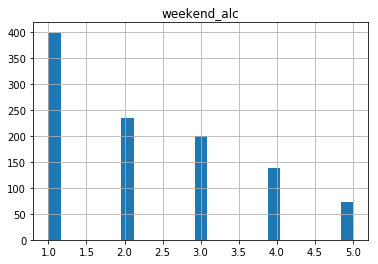

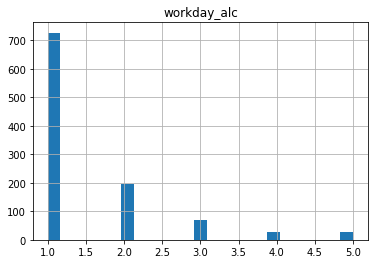

In [16]:
#Weekend and weekday alochol consumption on a histogram to show amount of students in each category. 
f4 = df.hist('weekend_alc',bins=25)
f5 = df.hist('workday_alc',bins=25)
f4 = plt.gcf()
f5 = plt.gcf()

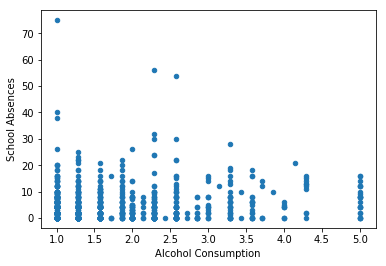

In [17]:
#Combine the two alcohol consumption data using a weight of 5/7 for workday consumption and 2/7 for weekend consumption.

alc = 5/7*df['workday_alc']+2/7*df['weekend_alc']
df['alc'] = alc

#Create a scatter plot
plt.scatter(df['alc'], df['school_absences'], s=20)
plt.xlabel('Alcohol Consumption')
plt.ylabel('School Absences')
workday_absence = plt.gcf()

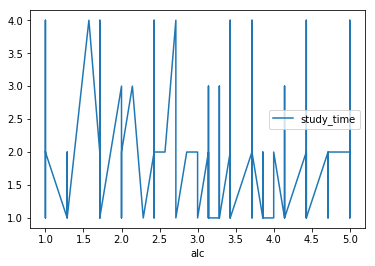

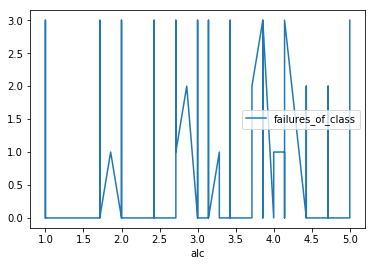

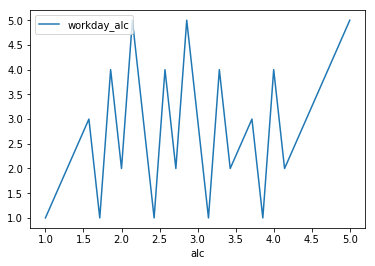

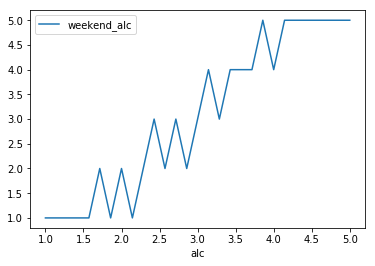

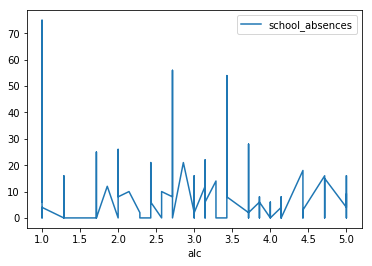

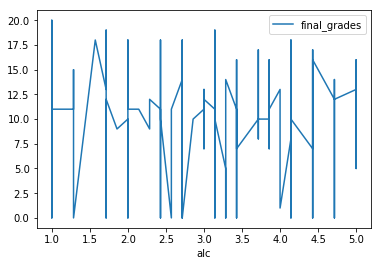

In [15]:
#Plot average level of alcohol consumption against each factor
cols = ["study_time", "failures_of_class", "workday_alc", "weekend_alc",
              "school_absences", "final_grades"]
for col in cols:
    df.plot.line(x='alc',y=col)


Just from looking at the graphs above, we were still unable to find a correlation between alcohol consumption and school invovlment. As a result, we decided to try other graphs to see if we can get a better visualization of the data and focus on certain specific factors. The first one we analyzed was a student's study time. 

We graphed the study time of students who put 1 as their level of alcohol consumption and students who put 5 as their level of consumption during the workday. This data is hard to analyze because there are more students who put 1 as their level of consumption versus 5, so there is more data for 1 than there is for 5. Around 175 of students who has a level 1 alcohol consumption said they studied for an hour and only 14 students who has a level 5 alcohol consumption said they studied for one hour.

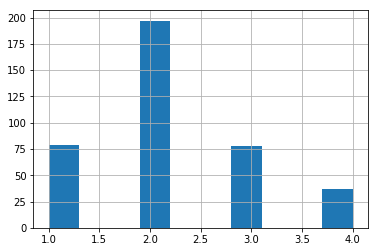

In [21]:
#study time of students who put 1 as their level of alcohol consumption during workdays
workday = df[df['alc'] == 1]['study_time']
f2 = workday.hist()
f2 = plt.gcf()

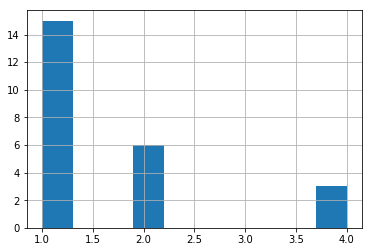

In [19]:
#study time of students who put 5 as their level of alcohol consumption during workdays
workday1 = df[df['alc'] == 5]['study_time']
f1 = workday1.hist()
f1 = plt.gcf()

From the above graphs, at first glance, it seems that students who put 5 as their level of alcohol study less than people who put 1, but we know that is not the case. It only seems that way because the axis are not the same. Therefore we decided to plot the data by percentage using a pie chart. First we counted the amount of people in level 1 alcohol consumption and level 5 alcohol consumption, then we divided that number by the total amount of participants in the survey.

2    197
1     79
3     78
4     37
Name: study_time, dtype: int64


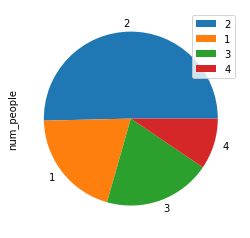

In [22]:
num_people = df[df['alc'] == 1]['study_time'].value_counts()
print(num_people)

df_pie = pd.DataFrame({'num_people':num_people},
                    index = [2,1,3,4])
df_pie.plot.pie(y='num_people')

1    15
2     6
4     3
Name: study_time, dtype: int64


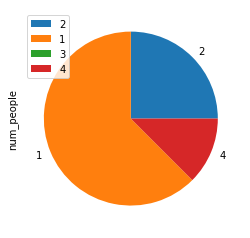

In [23]:
num_people = df[df['alc'] == 5]['study_time'].value_counts()

print(num_people)
#plt.pie(df['workday_alc'] == 1, labels = df['study_time'], startangle=90, autopct='%.1f%%')
df_pie = pd.DataFrame({'num_people':num_people},
                     index = [2,1,3,4])
df_pie.plot.pie(y='num_people')

In [24]:
w_a = df['workday_alc'].unique()
# Exclude 5 because sample is too small
w_a = [1,2,3,4,5]
avg_study = []
for i in w_a:
    temp_study = df[df['workday_alc'] == i]['study_time']
    avg_study.append(np.mean(temp_study))
avg_study
#plt.plot(x=w_a, y=avg_study)
#plt.show()
df_l = pd.DataFrame({'avg_study':avg_study},
                     index = w_a)
#lines = df_l.plot.line()
avg_study
df['workday_alc'].value_counts()

1    727
2    196
3     69
5     26
4     26
Name: workday_alc, dtype: int64

## Finalized data result and Visualization

After all the things done above, we decide to give a weight to all factors related to the study to give student a variable called school performance. This is mostly calulated from the final grades minus school absences plus weighted study time and failure of class. The reason why we chose to subtract school absences and failure of classes is because we believe the higher these numbers are, the more uninvolved a student would be in school. In our dataset, the higher the numberic value for school involvement, the more time the students spends on school work.

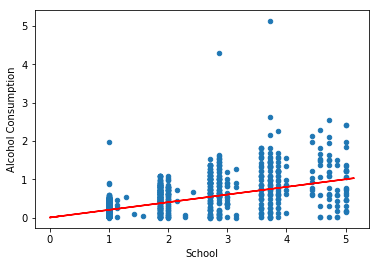

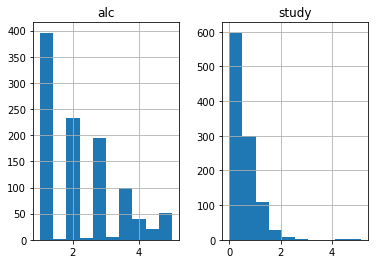

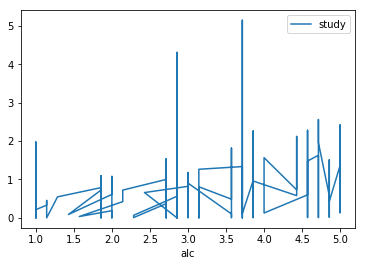

In [26]:
# study_will = (0.1*df['study_time'])-(0.1*df['failures_of_class'])-(0.1*df['school_absences'])+(df['final_grades'])
study_will = (df['weekend_alc']/100)*((0.1*df['study_time'])-(0.1*df['failures_of_class'])-(1.5*df['school_absences'])+(1.5*df['final_grades']))
study_will = abs(study_will)*2
alc = 1/7*df['workday_alc']+6/7*df['weekend_alc']
alc
df_w = pd.DataFrame({'alc':alc,
                    'study':study_will})
df_w
plt.scatter(df_w['alc'], df_w['study'], s=20)
plt.ylabel('Alcohol Consumption')
plt.xlabel('School')
plt.plot(df_w['study'], df_w['study']*0.2, color='red')
f1 = df_w.hist()
f1 = plt.gcf()
df_w.plot.line(x='alc',y='study')

As shown from the data above, we have a positive correlation between school performance and alcohol consumption. We plot the correlation with three kinds of graphs. This backs up what we originally hypoethesized in the beginning. We could then analyze the relation between alcohol consumption with each factor depending on the weight of each factor in the shcool performance.

Also, we draw the regression line to give out a better understanding of correlation. And we use smpredictor from patsy to do the prediction base on the variable study and alc consumption. Because the purpose of this project is not only find out the correlation but also help high school to prevent high school students' alcohol consumption, we want to give out more specific data on the influence from alcohol consumption to the study of students to allow us to come up with more specifc ways to target decreasing alcohol consumption. 

In [27]:
import patsy
import statsmodels.api as sm

# Correlation analysis with study and alc
df_s = df_w.head(5)
outcome, predictors = patsy.dmatrices('study ~ alc', df_s)
mod_all = sm.OLS(outcome, predictors)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  study   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 12 Jun 2019   Prob (F-statistic):                nan
Time:                        21:55:46   Log-Likelihood:                 2.6680
No. Observations:                   5   AIC:                            -3.336
Df Residuals:                       4   BIC:                            -3.727
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0910      0.035      2.565      0.0

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In addition, we also drew out the heat map between age and alcohol consupmtion to make a horizontal hypothesis besides our main hypothesis. This is a more direct view of the correlation as the study got influenced by alcohol consumption, despite whether the student spends more time on school activities or not(students spending more time on school activities would have a higher study value).

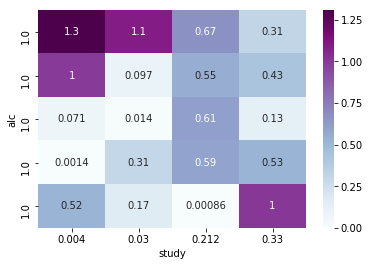

In [28]:
import seaborn as sns
%matplotlib inline

Index= df_w['alc'].head(5)
Cols = df_w['study'].head(4)
df_h = pd.DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df_h, annot=True,cmap="BuPu")

# Ethics & Privacy

An ethical issue we need to consider for our project is privacy. We are exploring a topic that not only reveals that the number of students who perform underage drinking but also forces us to analyze some of their personal backgrounds. The dataset we are using contains a lot of personal information about each student, such as their sex, age, address, family size, parental cohabitation status, parent’s education level, parent’s jobs, the reason they chose to attend their school, guardian, travel time from home to school, study time, number of failed classes, whether they receive extra educational support, whether they receive family education support, whether they take extra paid classes, extracurricular classes, and whether they attended nursery school. Although these data sets consists of a lot of data about each student’s personal background, we justified the use of this dataset because a majority of the information provided to us is binary or numerical, which means that we do not have access to the details of these aspects of their lives. For example, we do not actually have access to their specific addresses. Instead, we only know if they live in a rural or urban area. Also, the data is anonymous so we do not know the identities of the students. The information we analyzed is very general and privacy is not entirely a huge issue in this case. However, we will continue to acknowledge how this information is still private to some extent as we work on our project.
	
The data is completely anonymous so although we have information on different individuals, we do not have access to who they actually are. The information comes from a survey of students taking Math and Portuguese classes at a secondary school. There is consent since the students willingly filled out the survey with their information. The data may not be representative of the general high school population because it only consists of the population of high school students taking Math and Portuguese classes. Also, since the data is from surveys, then there may be bias in our data since the students may not have answered honestly, or they may have misread the question and answered differently. This means that the data may not fully represent the true answers of the students who took the survey. Although this may be an issue, it is is not a significant problem in our project because even though these are answers from a survey, they are answers that do not reflect specific opinions on things so there is not a significant issue with bias. The survey simply gathers mainly objective information about the student’s life, so there is a very low chance of bias in our data.



# Conclusion & Discussion

## Analysis result

Based on our data analysis and visulization, we conclude that alcohol consumption is definitly related to the chool performance. We define the school performance with multiple factors. We use study time, whether a student was attending extra paid classes, the number of classes a student failed, whether a student wanted to pursue higher education, school absences, and final grades of students to define their level of school involvement. We assumed that the higher the level of school involvement, the more time the student would be spending in school. After analyzing all the factors seperated with alcohol consumption level, we found that school absences and final grades has the highest level of correlation to alcohol consumption. All the other factors seems to have a weak correlation with alcohol consumption by itself.

When we combined all the school involvement factors together into one major factor, we were able to find a positive correlation between spending time with school related activities and alcohol consumption, proving our hypothesis. Therefore we conclude that individual school related factors do not make a big difference in the level of consumption of a student. We have to look at the overall school involvement of a student to predict their level of alcohol consumption.

## Limitation

Some limitations we have in our data set is that there is not a lot of detail on the alcohol consumption of the student. It is represented by levels instead of actual amounts of alcohol. Students may have very different definitions on what is considered a little alcohol and what is considered a lot, so the data may not be very accurate. We also have limitations in the size of dataset because the data is coming from a very specific area. In this case, it is students who are enrolled in math and Portuguese class. Our analysis could be stronger if this survey was given to all high school students in America.

Though our focus of the project is high school students, it is due to the limitation of our data being only on high school students. Underaged drinking can include students in middle school and even elementary school. With extra data, we may be able to analyze drinking patterns in underaged children in general. 

## Future plan

In the future, we want to include more data from high shcool and university students because based on our referrence and background research, university alcohol comsumption is much more harsher than students in the high school. We believe that our analysis may be a good start to investigating a larger topic and can lead to changing the school system. If there is more proven data on how participating in extracurricular school activities, having more classes, and a higher level of school involvement as a whole can lower the alochol consumption in underaged teens, the public should support expanding afterschool activities and putting more funding into extracurriculars to keep students busy. That can provide children with safer and better environments to grow up in, leading to the betterment of other aspects of their lives. Implementing these programs would not only help the children but can also help the community. If there were more programs for students to volunteer, hold internships, participate in STEAM projects or more, that could also better the community as a whole.